- Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

In [4]:
premier_df = pd.read_csv('C:\\Users\\elgab\\Desktop\\NUBE MEGA\\PROGRAMACIÓN\\2020-2021\\IT_Academy\\itinerario DS\\bases_datos\\premier_league.csv', sep=',')
#premier_df = pd.read_csv('C:\\Users\\formacio\\Gabriel De Santis\\Datasets\\premier_league.csv', sep=',')
premier_df.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [5]:
premier_df.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [6]:
premier_df['Shooting accuracy %']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
566    32%
567    35%
568    27%
569     0%
570     0%
Name: Shooting accuracy %, Length: 571, dtype: object

In [7]:
premier_df.Age.value_counts(normalize=True)

29.0    0.082456
27.0    0.082456
23.0    0.080702
28.0    0.077193
24.0    0.073684
26.0    0.071930
20.0    0.068421
22.0    0.064912
25.0    0.064912
31.0    0.054386
30.0    0.050877
21.0    0.049123
19.0    0.047368
32.0    0.036842
33.0    0.033333
18.0    0.022807
34.0    0.012281
35.0    0.010526
17.0    0.005263
36.0    0.005263
38.0    0.003509
37.0    0.001754
Name: Age, dtype: float64

In [8]:
premier_df.Age.count()

570

In [9]:
premier_df.Age.dtype

dtype('float64')

In [10]:
premier_df.Age.isna().sum()

1

In [11]:
premier_df[premier_df.Age.isna()]

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
241,Ezgjan Alioski,10.0,Leeds-United,Midfielder,NaN,NaN,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0.0


In [12]:
premier_df.Age = premier_df.Age.fillna(round(premier_df.Age.mean()))

In [13]:
premier_df.Age.isna().sum()

0

<AxesSubplot:xlabel='Age', ylabel='Count'>

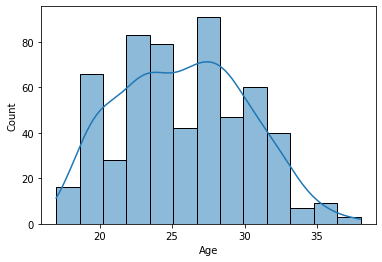

In [14]:
sns.histplot(premier_df.Age, kde=True)

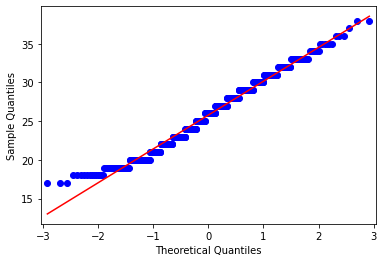

In [15]:
qqplot(premier_df.Age, line='s')
plt.show()

In [16]:
stat, p = stats.shapiro(premier_df.Age)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.981, p=0.000


- Exercici 2
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

In [17]:
print(premier_df['Jersey Number'].isnull().sum())
print(premier_df['Jersey Number'].count())

8
563


In [18]:
premier_copy = premier_df.sort_values(by='Position').copy(deep=True)

In [19]:
premier_copy['Jersey Number'] = premier_copy['Jersey Number'].fillna(method='bfill')
premier_copy['Jersey Number'].isna().sum()

0

In [20]:
premier_copy['Jersey Number'] = premier_copy['Jersey Number'].astype('int64').astype('string').astype('category')

In [21]:
premier_copy.Position = premier_copy.Position.astype('category')

In [22]:
table = pd.crosstab(premier_copy.Position, premier_copy['Jersey Number'])
table

Jersey Number,1,10,11,12,13,14,15,16,17,18,...,67,69,7,71,72,73,76,8,82,9
Position,,,,,,,,,,,,,,,,,,,,,
Defender,0,0,1,5,3,3,4,4,1,5,...,0,0,0,1,1,0,1,0,0,0
Forward,0,8,9,3,2,5,1,1,6,2,...,0,0,10,0,0,0,0,0,0,19
Goalkeeper,16,0,1,4,5,0,1,0,0,1,...,0,0,0,0,0,2,0,0,0,0
Midfielder,0,12,8,3,2,6,7,7,8,8,...,1,1,9,0,0,0,0,19,1,0


In [23]:
stat, p, dof, expected = stats.chi2_contingency(table)

In [24]:
p

9.819388257706459e-43

In [25]:
prob = 0.95
alpha = 1.0 - prob

if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


In [26]:
null = premier_df.isna().sum() / len(premier_df) *100
not_null = list(null[null == 0].index)
not_null

['Name',
 'Club',
 'Position',
 'Age',
 'Appearances',
 'Wins',
 'Losses',
 'Goals',
 'Assists',
 'Passes',
 'Passes per match',
 'Yellow cards',
 'Red cards',
 'Fouls']

Només jugadors que hagin participat a almenys 10 partits.

In [27]:
premier = premier_df[not_null].copy(deep=True)
premier = premier[premier.Appearances > 10]
premier

,Name,Club,Position,Age,Appearances,Wins,Losses,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls
0,Bernd Leno,Arsenal,Goalkeeper,28.0,64,28,16,0,0,1783,27.86,2,0,0
3,Héctor Bellerín,Arsenal,Defender,25.0,160,90,37,7,18,7125,44.53,23,0,125
4,Kieran Tierney,Arsenal,Defender,23.0,16,7,5,1,1,519,32.44,2,0,9
6,Sokratis,Arsenal,Defender,32.0,44,21,11,3,2,2416,54.91,18,0,56
7,Rob Holding,Arsenal,Defender,25.0,41,25,9,0,0,2200,53.66,8,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,João Moutinho,Wolverhampton-Wanderers,Midfielder,34.0,78,32,23,2,14,3778,48.44,11,0,95
563,Leander Dendoncker,Wolverhampton-Wanderers,Midfielder,25.0,59,26,15,6,0,1966,33.32,6,0,43
566,Pedro Neto,Wolverhampton-Wanderers,Forward,20.0,31,14,7,3,4,399,12.87,3,0,16
567,Raúl Jiménez,Wolverhampton-Wanderers,Forward,29.0,78,32,23,32,13,2108,27.03,7,0,81


<AxesSubplot:xlabel='Wins_per_match', ylabel='Count'>

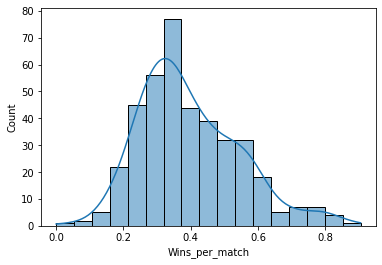

In [28]:
premier['Wins_per_match'] = premier.Wins / premier.Appearances
sns.histplot(premier.Wins_per_match, kde=True)

<AxesSubplot:xlabel='Goals_per_match', ylabel='Count'>

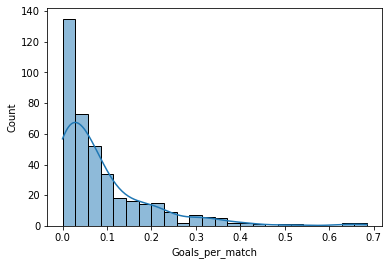

In [29]:
premier['Goals_per_match'] = premier.Goals / premier.Appearances
sns.histplot(premier.Goals_per_match, kde=True)

<AxesSubplot:xlabel='Assists_per_match', ylabel='Count'>

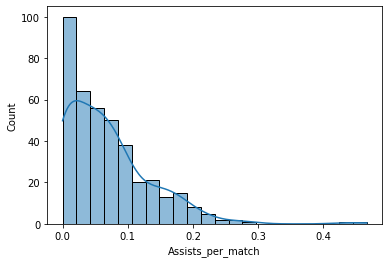

In [30]:
premier['Assists_per_match'] = premier.Assists / premier.Appearances
sns.histplot(premier.Assists_per_match, kde=True)

<AxesSubplot:xlabel='Yellow_per_match', ylabel='Count'>

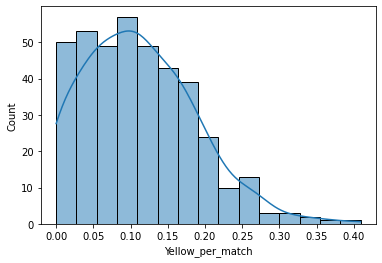

In [31]:
premier['Yellow_per_match'] = premier['Yellow cards'] / premier.Appearances
sns.histplot(premier.Yellow_per_match, kde=True)

<AxesSubplot:xlabel='Red_per_match', ylabel='Count'>

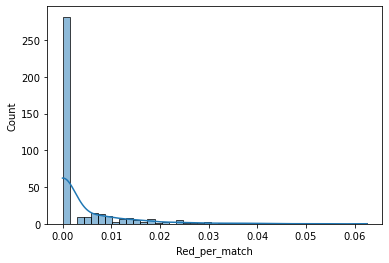

In [32]:
premier['Red_per_match'] = premier['Red cards'] / premier.Appearances
sns.histplot(premier.Red_per_match, kde=True)

<AxesSubplot:xlabel='Fouls_per_match', ylabel='Count'>

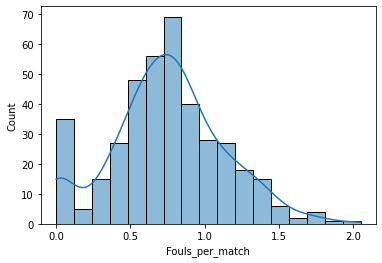

In [33]:
premier['Fouls_per_match'] = premier.Fouls / premier.Appearances
sns.histplot(premier.Fouls_per_match, kde=True)

In [34]:
corrs_variables = premier[['Name', 'Club', 'Position', 'Age', 'Appearances', 'Passes per match', 'Wins_per_match', 'Assists_per_match', 'Yellow_per_match', 'Red_per_match', 'Fouls_per_match', 'Goals_per_match']]

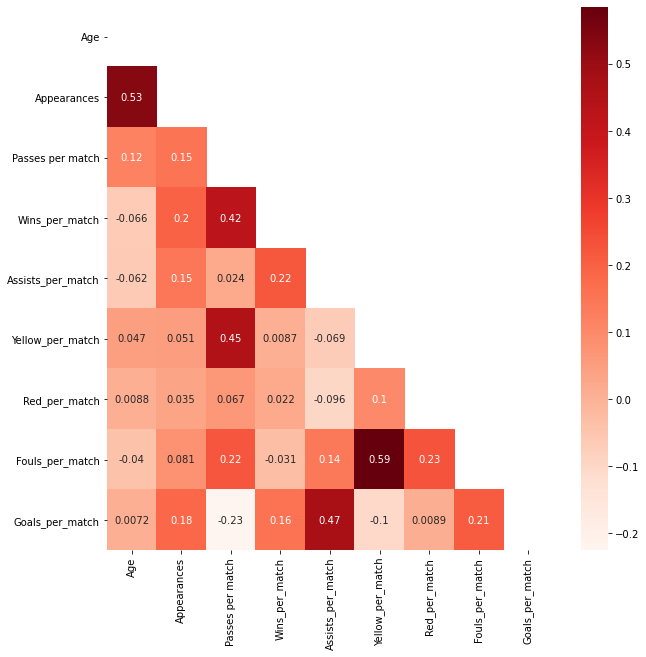

In [35]:
matrix = np.triu(corrs_variables.corr())
plt.figure(figsize=(10,10))
fig = sns.heatmap(corrs_variables.corr(), annot=True, cmap='Reds', mask=matrix)

<AxesSubplot:xlabel='Fouls_per_match', ylabel='Yellow_per_match'>

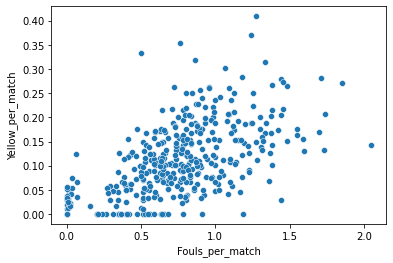

In [36]:
sns.scatterplot(x=premier.Fouls_per_match, y = premier.Yellow_per_match)

<AxesSubplot:xlabel='Yellow_per_match', ylabel='Count'>

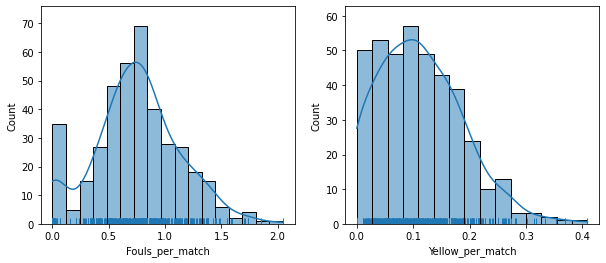

In [37]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.histplot(premier.Fouls_per_match, kde=True, ax=axs[0])
sns.rugplot(premier.Fouls_per_match, ax=axs[0])
sns.histplot(premier.Yellow_per_match, kde=True, ax=axs[1])
sns.rugplot(premier.Yellow_per_match, ax=axs[1])

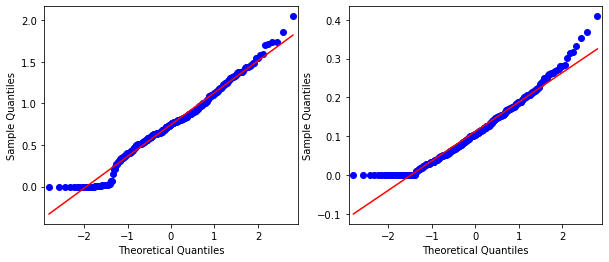

In [38]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

qqplot(premier.Fouls_per_match, line='s', ax = axs[0])
qqplot(premier.Yellow_per_match, line='s', ax = axs[1])

plt.show()

In [39]:
stat, p = stats.shapiro(premier.Fouls_per_match)
print('Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = stats.shapiro(premier.Yellow_per_match)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.981, p=0.000
Statistics=0.963, p=0.000


No segueixen cap distribució normal.

In [40]:
premier.Fouls_per_match.corr(premier.Yellow_per_match, method='spearman')

0.6103253534616767

In [41]:
premier.Fouls_per_match.corr(premier.Yellow_per_match, method='kendall')

0.431665651067847

In [53]:
r, p = stats.spearmanr(premier.Fouls_per_match, premier.Yellow_per_match)
print(f"Correlación Spearman: r={r}, p-value={p:.43f}")

r, p = stats.kendalltau(premier.Fouls_per_match, premier.Yellow_per_match)
print(f"Correlación Kendall: r={r}, p-value={p:.38f}")

Correlación Spearman: r=0.6103253534616767, p-value=0.0000000000000000000000000000000000000000070
Correlación Kendall: r=0.431665651067847, p-value=0.00000000000000000000000000000000000021


In [47]:
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Samples are correlated (reject H0) p=0.000


- Exercici 3
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.



In [43]:
premier.Position.unique()

array(['Goalkeeper', 'Defender', 'Midfielder', 'Forward'], dtype=object)

In [44]:
defenders = premier[premier.Position == 'Forward']
defenders

,Name,Club,Position,Age,Appearances,Wins,Losses,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls,Wins_per_match,Goals_per_match,Assists_per_match,Yellow_per_match,Red_per_match,Fouls_per_match
23,Alexandre Lacazette,Arsenal,Forward,29.0,99,46,28,39,16,2045,20.66,11,0,127,0.464646,0.393939,0.161616,0.111111,0.000000,1.282828
24,Pierre-Emerick Aubameyang,Arsenal,Forward,31.0,87,43,25,55,13,1880,21.61,4,1,30,0.494253,0.632184,0.149425,0.045977,0.011494,0.344828
25,Nicolas Pépé,Arsenal,Forward,25.0,33,15,9,5,6,723,21.91,4,0,14,0.454545,0.151515,0.181818,0.121212,0.000000,0.424242
26,Reiss Nelson,Arsenal,Forward,20.0,20,10,5,1,0,286,14.30,1,0,8,0.500000,0.050000,0.000000,0.050000,0.000000,0.400000
27,Eddie Nketiah,Arsenal,Forward,21.0,23,12,8,4,0,172,7.48,0,1,18,0.521739,0.173913,0.000000,0.000000,0.043478,0.782609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,Jarrod Bowen,West-Ham-United,Forward,23.0,22,4,15,1,4,328,14.91,0,0,8,0.181818,0.045455,0.181818,0.000000,0.000000,0.363636
546,Sébastien Haller,West-Ham-United,Forward,26.0,34,9,18,7,1,779,22.91,1,0,49,0.264706,0.205882,0.029412,0.029412,0.000000,1.441176
566,Pedro Neto,Wolverhampton-Wanderers,Forward,20.0,31,14,7,3,4,399,12.87,3,0,16,0.451613,0.096774,0.129032,0.096774,0.000000,0.516129
567,Raúl Jiménez,Wolverhampton-Wanderers,Forward,29.0,78,32,23,32,13,2108,27.03,7,0,81,0.410256,0.410256,0.166667,0.089744,0.000000,1.038462


In [45]:
corr_def = defenders[['Name', 'Club', 'Position', 'Age', 'Appearances', 'Passes per match', 'Wins_per_match', 'Assists_per_match', 'Yellow_per_match', 'Red_per_match', 'Fouls_per_match', 'Goals_per_match']]

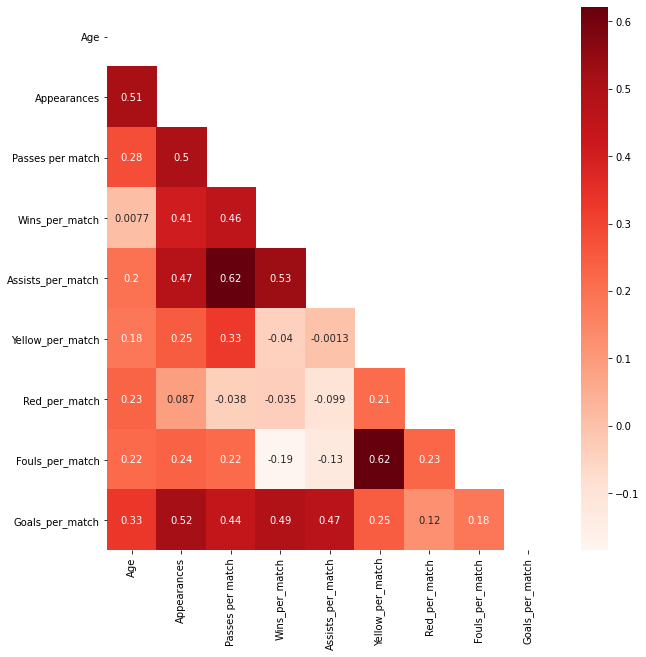

In [46]:
matrix = np.triu(corr_def.corr())
plt.figure(figsize=(10,10))
fig = sns.heatmap(corr_def.corr(), annot=True, cmap='Reds', mask=matrix)